## Завдання виконав студент групи ІПС-42 Сафронюк Олексій Сергійович

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
data = pd.read_csv("Expanded_data_with_more_features.csv")
data = data.drop("Unnamed: 0", axis=1)

In [3]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### Розподіл за статтю серед учнів

1. Скільки студентів і студенток у наборі даних?

In [4]:
male_count = len(data.loc[data["Gender"] == "male"])
male_count

15217

In [5]:
female_count = len(data.loc[data["Gender"] == "female"])
female_count

15424

2. Який відсоток студентів чоловічої статі в наборі даних?
3. Який відсоток студенток у наборі даних?

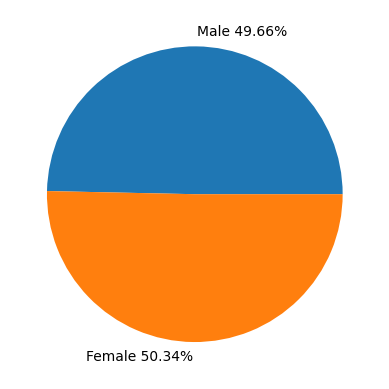

In [6]:
count = len(data["Gender"])
male_percent = round(male_count/count * 100, 2)
female_percent = round(female_count/count * 100, 2)

plt.pie([male_count, female_count], labels=[f"Male {male_percent}%", f"Female {female_percent}%"])
plt.show()

### Зв’язок між етнічною групою та результатами тестів

4. Яка етнічна група має найвищий середній бал з математики?

In [7]:
ethnicMath = data.groupby("EthnicGroup")["MathScore"].median()
f"Math: {ethnicMath.idxmax()} - {ethnicMath.max()}"

'Math: group E - 76.0'

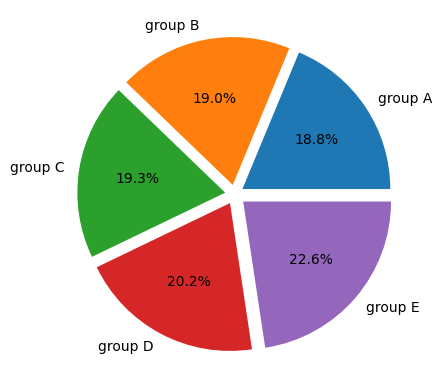

In [8]:
plt.pie(ethnicMath, labels = ethnicMath.keys(), explode = ethnicMath/1000, autopct='%1.1f%%')
plt.show()

5. Яка етнічна група має найвищий середній бал читання?

In [9]:
ethnicReading = data.groupby("EthnicGroup")["ReadingScore"].median()
f"Reading: {ethnicReading.idxmax()} - {ethnicReading.max()}"

'Reading: group E - 75.0'

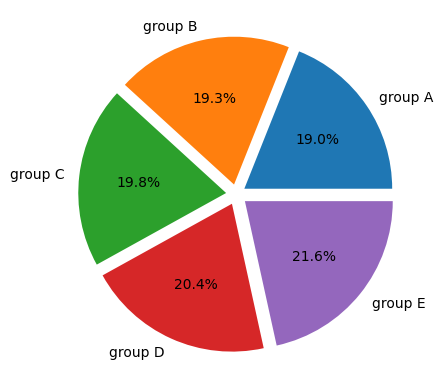

In [10]:
plt.pie(ethnicReading, labels = ethnicReading.keys(), explode = ethnicReading/1000, autopct='%1.1f%%')
plt.show()

6. Яка етнічна група має найвищий середній бал з письма?

In [11]:
ethnicWriting = data.groupby("EthnicGroup")["WritingScore"].median()
f"Writing: {ethnicWriting.idxmax()} - {ethnicWriting.max()}"

'Writing: group E - 73.0'

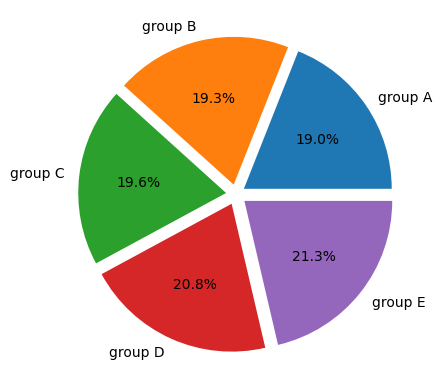

In [12]:
plt.pie(ethnicWriting, labels = ethnicWriting.keys(), explode = ethnicWriting/1000, autopct='%1.1f%%')
plt.show()

### Вплив курсу підготовки до тесту на результати тесту

7. Який середній бал з математики для студентів, які закінчили курс підготовки до тесту?

In [13]:
test = data.groupby("TestPrep")["MathScore"].median()
f'Math: {test["completed"]}'

'Math: 70.0'

8. Який середній бал з читання для студентів, які пройшли курс підготовки до тесту?

In [14]:
test = data.groupby("TestPrep")["ReadingScore"].median()
f'Reading: {test["completed"]}'

'Reading: 74.0'

9. Який середній бал з письма для студентів, які закінчили курс підготовки до тесту?

In [15]:
test = data.groupby("TestPrep")["WritingScore"].median()
f'Writing: {test["completed"]}'

'Writing: 75.0'

### Розподіл батьків(ів) за сімейним станом серед учнів

10. Скільки студентів мають одружених батьків?

In [16]:
parents = data.groupby("ParentMaritalStatus")["ParentMaritalStatus"].count()
parents["married"]

16844

11. Скільки студентів мають батьків-одинаків?

In [17]:
parents["single"]

7097

### Зв’язок між заняттями спортом і результатами тестів

12. Чи студенти, які регулярно займаються спортом, мають вищі середні результати з математики, ніж ті, хто ніколи не займається спортом?

In [18]:
sport = data.groupby("PracticeSport")["MathScore"].median()
sport["regularly"] > sport["never"]

True

13. Чи студенти, які регулярно займаються спортом, мають вищі середні результати читання, ніж ті, хто ніколи не займається спортом?

In [19]:
sport = data.groupby("PracticeSport")["ReadingScore"].median()
sport["regularly"] > sport["never"]

True

### Розподіл транспортних засобів до школи серед учнів

14. Скільки учнів користується шкільним автобусом, щоб дістатися до школи?

In [20]:
transport = data.groupby("TransportMeans")["TransportMeans"].count()
transport["school_bus"]

16145

15. Скільки учнів користується приватним транспортом, щоб дістатися до школи?

In [21]:
transport["private"]

11362

## Задача класифікації

Передбачте, чи завершив студент курс підготовки до іспиту, на основі його демографічних та академічних даних.

Вхідні дані:
Gender, EthnicGroup, ParentEduc, LunchType, ParentMaritalStatus, PracticeSport, IsFirstChild, NrSiblings,       TransportMeans, WklyStudyHours, MathScore, ReadingScore, WritingScore

Результат: TestPrep

In [22]:
data = data.dropna()

In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(data.drop("TestPrep", axis=1))
X[:5]

array([[ 0.,  1.,  3.,  1.,  2.,  2.,  1.,  4.,  1.,  1., 81., 82., 81.],
       [ 1.,  2.,  4.,  1.,  1.,  2.,  1.,  0.,  1.,  0., 70., 67., 65.],
       [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0., 67., 73., 69.],
       [ 0.,  1.,  4.,  1.,  3.,  0.,  0.,  1.,  0.,  0., 79., 82., 79.],
       [ 1.,  1.,  4.,  0.,  1.,  2.,  1.,  1.,  0.,  2., 35., 32., 29.]])

In [24]:
y = np.array([0 if i == "none" else 1 for i in data["TestPrep"].values])
y[:5]

array([0, 0, 0, 1, 0])

In [25]:
len(X)

19243

In [26]:
len(y)

19243

In [27]:
X_train, X_test, y_train, y_test = X[:9000], X[9000:], y[:9000], y[9000:]

In [28]:
y_train_1 = (y_train == 1)

In [35]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=83)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(random_state=83)

In [37]:
sgd_clf.predict([X[120]])

array([ True])

In [38]:
y[120]

1

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.67233333, 0.63433333, 0.74466667])

In [40]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [41]:
X_valid, X_train_2 = X_train[:5000], X_train[5000:]
y_valid, y_train_2 = y_train[:5000], y_train[5000:]

In [42]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/100
282/282 [==============================] - 2s 3ms/step - loss: 5.5181 - accuracy: 0.5690 - val_loss: 0.2253 - val_accuracy: 0.6636
Epoch 2/100
282/282 [==============================] - 1s 3ms/step - loss: 0.2048 - accuracy: 0.6937 - val_loss: 0.1896 - val_accuracy: 0.7102
Epoch 3/100
282/282 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.7097 - val_loss: 0.1834 - val_accuracy: 0.7184
Epoch 4/100
282/282 [==============================] - 1s 3ms/step - loss: 0.1899 - accuracy: 0.7187 - val_loss: 0.1819 - val_accuracy: 0.7272
Epoch 5/100
282/282 [==============================] - 1s 3ms/step - loss: 0.1841 - accuracy: 0.7251 - val_loss: 0.1788 - val_accuracy: 0.7296
Epoch 6/100
282/282 [==============================] - 1s 4ms/step - loss: 0.1899 - accuracy: 0.7143 - val_loss: 0.1801 - val_accuracy: 0.7336
Epoch 7/100
282/282 [==============================] - 1s 4ms/step - loss: 0.1857 - accuracy: 0.7261 - val_loss: 0.1776 - val_accuracy: 0.7382

In [43]:
proba = model.predict(X_test[:4])
proba.round(2)

1/1 [==============================] - 0s 158ms/step


array([[0.46],
       [0.2 ],
       [0.9 ],
       [0.53]], dtype=float32)

In [44]:
results = model.evaluate(X_test, y_test)
print(f"Test loss: {results[0]}, Test accuracy:{results[1]}")

321/321 [==============================] - 1s 2ms/step - loss: 0.1813 - accuracy: 0.7291
Test loss: 0.18132776021957397, Test accuracy:0.7290832996368408


In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(X_train_2, y_train_2, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
125/125 [==============================] - 1s 6ms/step - loss: 1.8870 - accuracy: 0.6097 - val_loss: 0.6437 - val_accuracy: 0.6542
Epoch 2/30
125/125 [==============================] - 0s 4ms/step - loss: 0.6535 - accuracy: 0.6453 - val_loss: 0.6133 - val_accuracy: 0.6734
Epoch 3/30
125/125 [==============================] - 1s 5ms/step - loss: 0.6427 - accuracy: 0.6532 - val_loss: 0.6342 - val_accuracy: 0.6562
Epoch 4/30
125/125 [==============================] - 0s 4ms/step - loss: 0.6311 - accuracy: 0.6522 - val_loss: 0.6166 - val_accuracy: 0.6626
Epoch 5/30
125/125 [==============================] - 1s 4ms/step - loss: 0.6250 - accuracy: 0.6610 - val_loss: 0.5988 - val_accuracy: 0.6896
Epoch 6/30
125/125 [==============================] - 0s 4ms/step - loss: 0.6228 - accuracy: 0.6653 - val_loss: 0.6296 - val_accuracy: 0.6458
Epoch 7/30
125/125 [==============================] - 1s 5ms/step - loss: 0.6096 - accuracy: 0.6865 - val_loss: 0.5955 - val_accuracy: 0.6868
Epoch 

In [46]:
proba = model.predict(X_test[:4])
proba.round(2)

1/1 [==============================] - 0s 58ms/step


array([[0.6 , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.88, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.45, 0.55, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.48, 0.52, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [47]:
y_pred = np.argmax(model.predict(X_test[:4]), axis=-1)
y_pred

1/1 [==============================] - 0s 21ms/step


array([0, 0, 1, 1])

In [48]:
y_test[:4]

array([0, 0, 1, 1])

In [49]:
y_test[:4] == y_pred

array([ True,  True,  True,  True])

In [50]:
results = model.evaluate(X_test, y_test)
print(f"Test loss: {results[0]}, Test accuracy:{results[1]}")

321/321 [==============================] - 1s 2ms/step - loss: 0.5898 - accuracy: 0.6921
Test loss: 0.5898317098617554, Test accuracy:0.692082405090332
